In [25]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from glob import glob

In [26]:
def plot(path):
    print(path)
    df = pd.read_csv(path, names=['name', 'size', 'threads', 'runtime', 'runtimesd', 'energy', 'energysd'])

    groups = df.groupby(['name', 'size'])
    maxes = groups.transform('max')
    df_norm = df[maxes.columns] / maxes
    df['runtime'] = df_norm['runtime']
    df['energy'] = df_norm['energy']

    num_sizes = len(df['size'].unique())
    fig, axs = plt.subplots(1, 2 * num_sizes, figsize=(6 * num_sizes, 3))
    do_legend = len(df['name'].unique()) > 1

    for ((size, df_size), (ax0, ax1)) in zip(df.groupby('size'), zip(axs[::2], axs[1::2])):
        sns.barplot(df_size, x='threads', y='runtime', hue='name', ax=ax0, legend=do_legend)
        sns.barplot(df_size, x='threads', y='energy', hue='name', ax=ax1, legend=do_legend)

        ax0.set_title(f'{size}')
        ax1.set_title(f'{size}')
        ax0.set(yticklabels=[])
        ax1.set(yticklabels=[])

    plt.tight_layout()
    plt.show()

cn125/nbody.csv


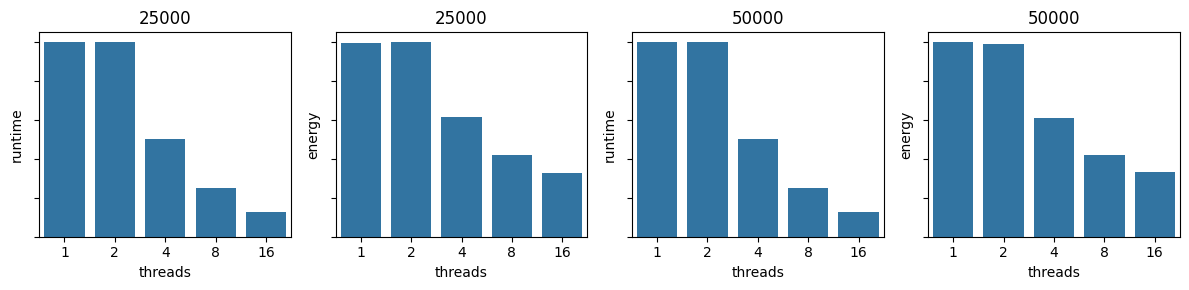

laptop-performance/nbody.csv


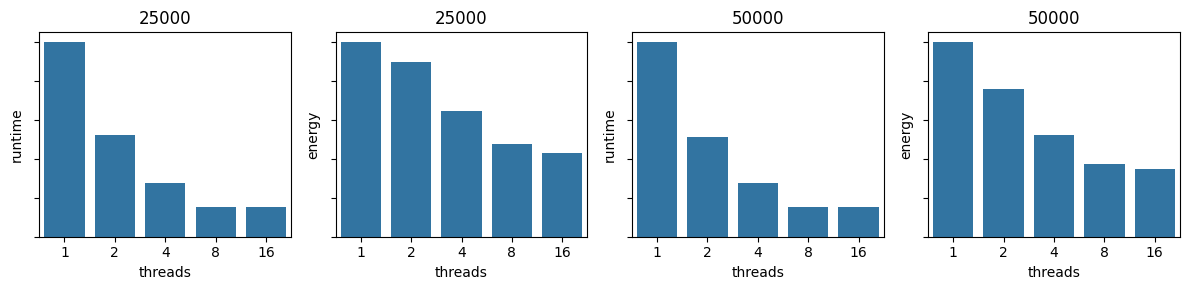

laptop-powersaver/nbody.csv


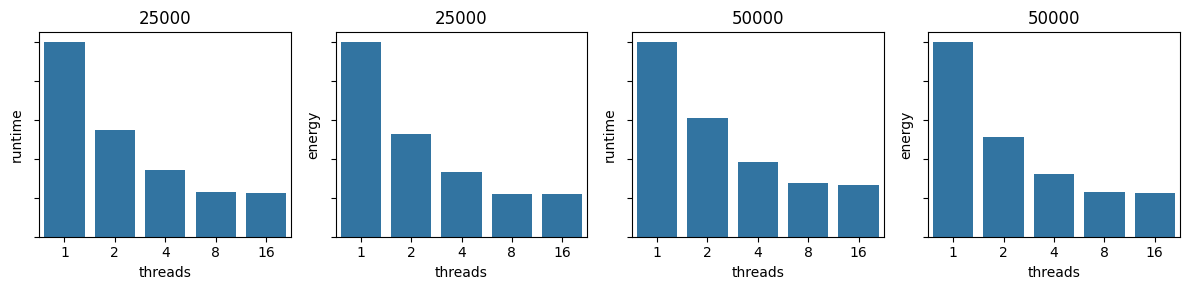

In [27]:
plot('cn125/nbody.csv')
plot('laptop-performance/nbody.csv')
plot('laptop-powersaver/nbody.csv')

cn125/matmul.csv


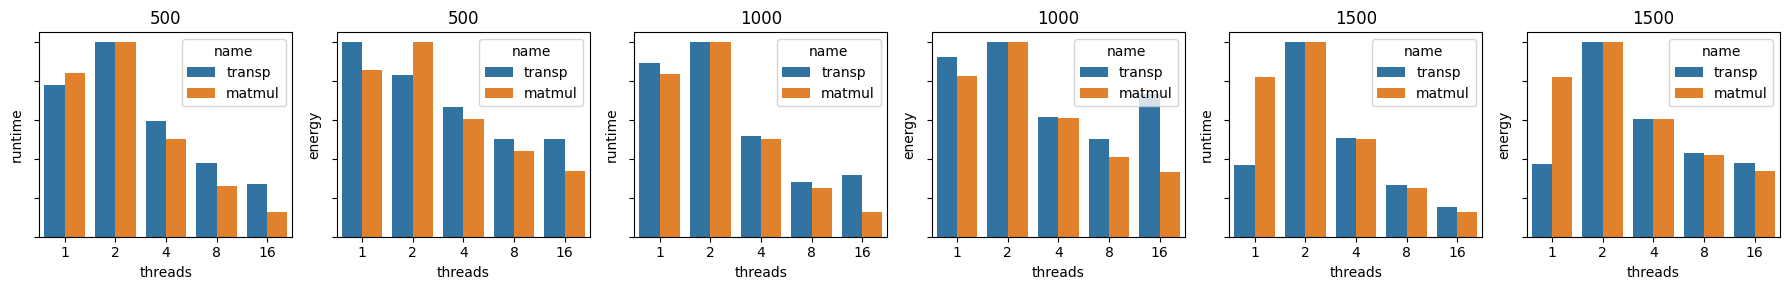

laptop-performance/matmul.csv


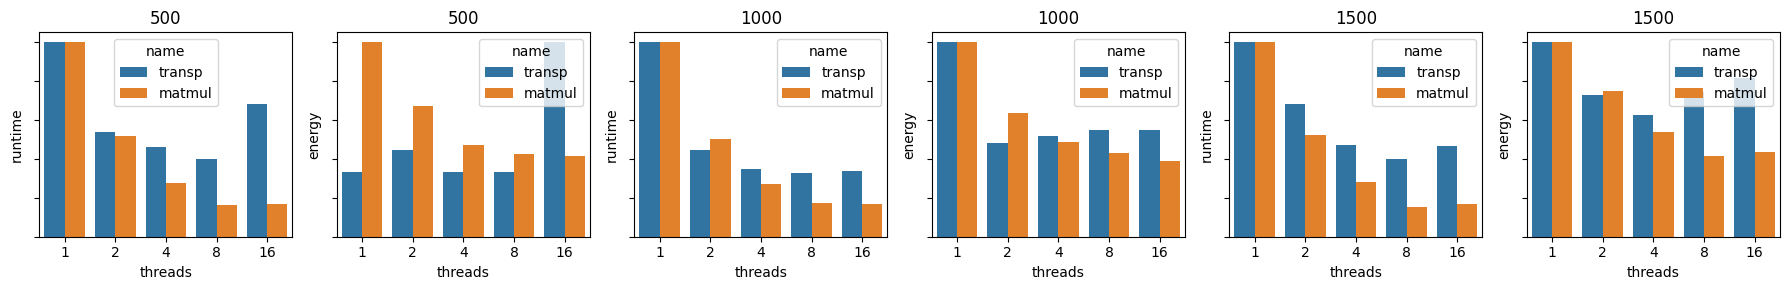

laptop-powersaver/matmul.csv


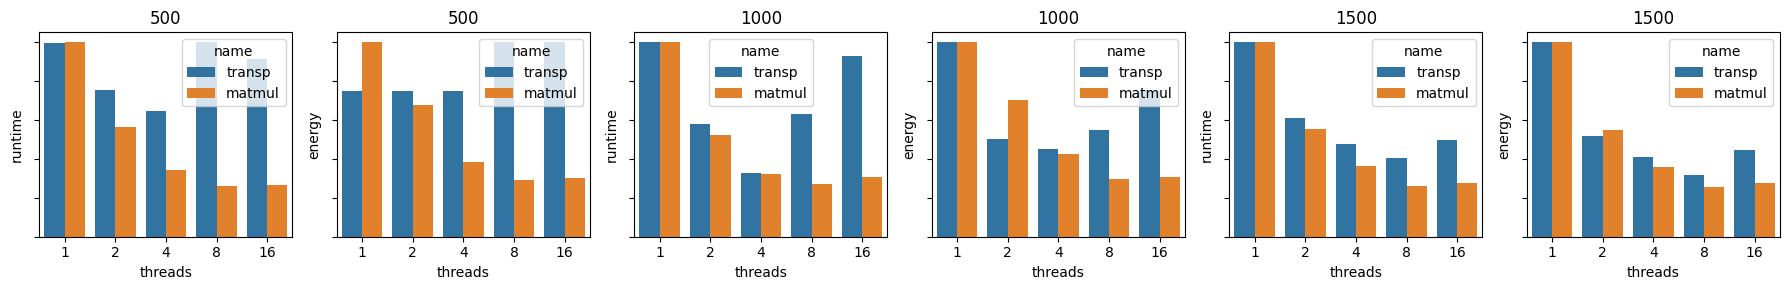

In [28]:
plot('cn125/matmul.csv')
plot('laptop-performance/matmul.csv')
plot('laptop-powersaver/matmul.csv')

cn125/stencil.csv


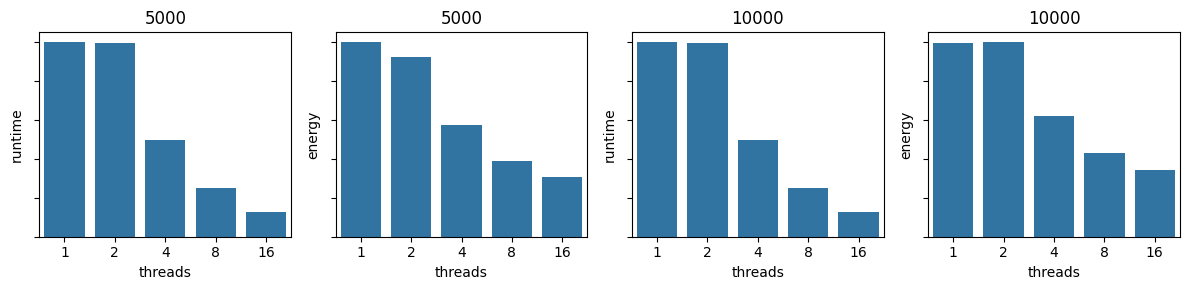

laptop-performance/stencil.csv


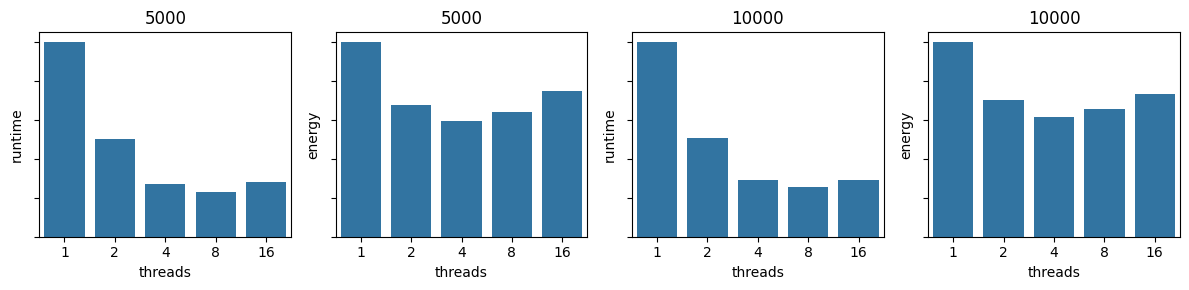

laptop-powersaver/stencil.csv


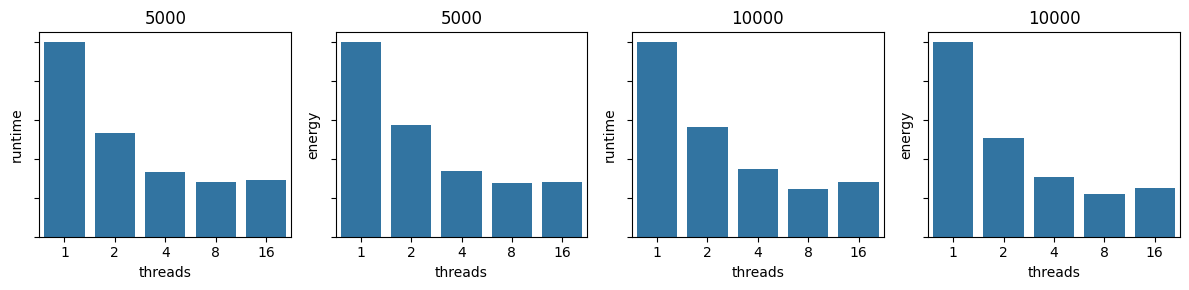

In [29]:
plot('cn125/stencil.csv')
plot('laptop-performance/stencil.csv')
plot('laptop-powersaver/stencil.csv')

laptop-performance/flash.csv


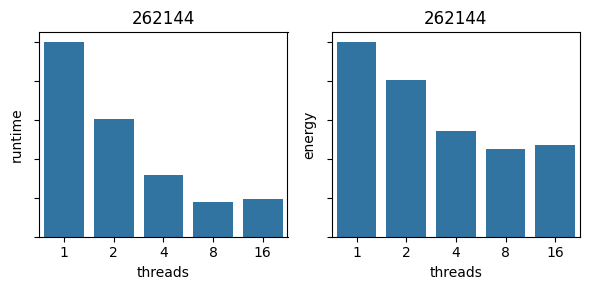

laptop-powersaver/flash.csv


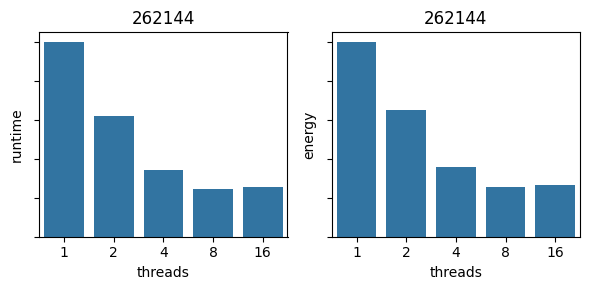

In [30]:
plot('cn125/flash.csv')
plot('laptop-performance/flash.csv')
plot('laptop-powersaver/flash.csv')